# Miary oceny klasyfikatorów

W realnych problemach związanych z podejmowanie decyzji (np. klasyfikacja binarna) bardzo często różne błędy mają różną wagę. Przykład: orzekanie o winności podejrzanego -> skazanie niewinnej osoby jest uznawane za błąd dużo gorszy niż nie skazanie osoby winnej (w naszej kulturze).

Dlatego w praktyce data science bardzo ważne jest dobranie odpowiedniej miary do problemu (rozumienie celu biznesowego!). Procent poprawnych klasyfikacji (*accuracy*) często nie jest właściwą miarą.

W klasyfikacji binarnej w praktyce zawsze przyjmujemy, że klasa $1$ jest klasą wyróżnioną. Klasę $1$ nazywamy klasą "positive", a klasę $0$ - "negative".

### Podstawowe pojęcia:

<img src="Grafika/confusion_matrix.png" style="width: 400px;">


## Najczęsciej stosowane miary (oprócz accuracy)

**Precyzja** - mówi o tym, jak *precyzyjny* jest klasyfikator - tzn. jak często, to co klasyfikator wskazał jako pozytywne, w rzeczywistości jest pozytywne:

$$precision = \frac{TP}{TP + FP}$$

**Czułość** - mówi o tym, jak *czuły* jest klasyfikator - tzn. w jakim stopniu wykrywa obserwacje, które są pozytywne:

$$recall = \frac{TP}{TP+FN}$$

**Miara F1** - średnia harmoniczna z precyzji i czułości:

$$F1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2 \cdot \frac{precicion \cdot recall}{precision + recall}$$

*Do przemyślenia: dlaczego średnia harmoniczna, a nie po prostu średnia arytmetyczna?*

#### Zadanie

Do każdego przypadku zaproponuj miarę jakości klasyfikatora, którą powinniśmy maksymalizować.

- robot żołnierz
 - Mamy robota, którego wysyłamy na woję, żeby walczył z ludźmi. Robot opiera swoje działanie przy użyciu klasyfikatora: widząć jakiegoś człowieka klasyfikuje go jako "cywila" (0) lub "wrogiego żołnierza" (1), i w drugim przypadku strzela do niego.
- robot lekarz
 - Mamy automat, który na podstawie wyników badań przewiduje czy badany pacjent jest zagrożony pewną chorobą (1) czy nic mu nie grozi (0). Jeśli przewiduje, że tak, to kieruje pacjenta na dodatkowe badania dające pewny wynik.
- robot sędzia
 - Zamiast sędziego w sądzie pracuje robot, który klasyfikuje podejrzanych jako winnych (1) lub nie (0).
- wyszukiwanie informacji - klasyfikacja fragmentów tekstów jako istotne
 - mamy automat, który skanuje teksty pojawiające się w internecie i klasyfikuje poszczególne fragmenty jako dotyczące naszej firmy (1) lub nie (0), po to aby w zautomatyzowany sposób gromadzić wzmianki o naszej firmie. Później zgromadzone przez ten automat teksty trafiają do szefa, który zamierza je wszystkie przeczytać.

In [1]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
y_true = [0, 0, 1, 1, 1]
y_pred = [0, 0, 0, 0, 1]

In [3]:
precision_score(y_true=y_true, y_pred=y_pred)

1.0

In [4]:
recall_score(y_true=y_true, y_pred=y_pred)

0.3333333333333333

In [5]:
f1_score(y_true=y_true, y_pred=y_pred)

0.5

In [7]:
print(classification_report(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.33      0.50         3

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



In [8]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
cm

array([[2, 0],
       [2, 1]], dtype=int64)

In [9]:
tn, fp, fn, tp = cm.ravel()

In [10]:
tn, fp, fn, tp

(2, 0, 2, 1)

# 1. Krzywa ROC

Mamy wektor prawdziwych klas $y = [0, 1, 1, ..., 0, 0]$ oraz wektor prawdopodobieństw zwrócony przez klasyfikator $p = [0.35, 0.55, 0.91, ..., 0.1, 0.44]$. Klasyfikujemy obserwacje według reguły $p(x) > t$ dla pewnego progu $t$.

Zdefiniujmy:
 - _false positive rate_ FPR - procent obserwacji klasy $0$ zaklasyfikowanych jako $1$,
 - _true positive rate_ TPR - procent obserwacji klasy $1$ zaklasyfikowanych jako $1$.

Obliczamy TPR($t$) oraz FPR($t$) dla każdego $t\in p$. Krywa ROC to wykres liniowy powstały z punktów (FPR($t$), TPR($t$)) (dla $t$ uporządkowanych malejąco).

Wskaźnik AUC to wielkość pola pod krzywą ROC.

Im wyżej leży krzywa, tym większe AUC i tym lepszy model. AUC bliskie 0.5 - model o praktycznie zerowej mocy predykcjyjnej. AUC bliskie 1 - model bardzo dobry. 

Uwaga. W praktyce korzysta się czasem wielkości wskaźnika Giniego: $gini = 2 * AUC - 1$, czyli jest to proste przekształcenie AUC. Chodzi o to, że dla AUC=0.5 gini = 0, a dla AUC = 1, gini = 1. Czyli zamiast operować na wielkości AUC z przedziału (0.5, 1), przenosimy się na skalę (0,1). 

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_roc_001.png" width="400">

Źródło: http://scikit-learn.org/stable/_images/sphx_glr_plot_roc_001.png

Tworzenie krzywej i obliczanie AUC:

[1.8  0.8  0.6  0.4  0.35 0.01]
[0.  0.  0.  0.5 0.5 1. ]
[0.         0.33333333 0.66666667 0.66666667 1.         1.        ]


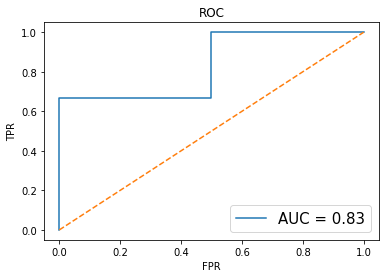

In [12]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
y = np.array([0, 0, 1, 1, 1])
scores = np.array([0.01, 0.4, 0.35, 0.8, 0.6])
fpr, tpr, thresholds = roc_curve(y, scores)
print(thresholds)
print(fpr)
print(tpr)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(fpr,tpr, label = "AUC = %.2f" % roc_auc_score(y,scores))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="lower right", prop={'size':15})
plt.show()

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [14]:
data = load_breast_cancer()

In [15]:
X, y = data.data, data.target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
X_train.shape

(398, 30)

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [23]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       150
           1       0.97      0.98      0.97       248

    accuracy                           0.97       398
   macro avg       0.97      0.96      0.97       398
weighted avg       0.97      0.97      0.97       398



In [24]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        62
           1       0.94      0.94      0.94       109

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [28]:
y_pred_proba_train = model.predict_proba(X_train)[:, 1]
y_pred_proba_test = model.predict_proba(X_test)[:, 1]

Krzywa ROC na zbiorze treningowym pozwala na oszacowanie dopasowania do modelu, jak widać jest bardzo dobrze

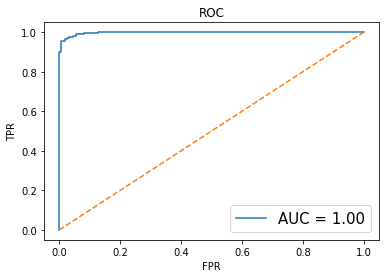

In [29]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba_train)

plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc_score(y_train, y_pred_proba_train))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="lower right", prop={'size':15})
plt.show()

Ocena klasyfikacji na zbiorze testowym

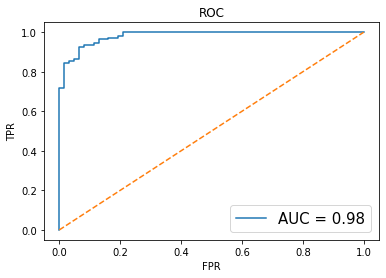

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)

plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc_score(y_test, y_pred_proba_test))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="lower right", prop={'size':15})
plt.show()

Jak teraz przejść do żywego modelu z wybranych thresholdem? 

Założmy, że TPR=80%

Szukamy thresholdu:

In [35]:
tpr

array([0.        , 0.00917431, 0.71559633, 0.71559633, 0.8440367 ,
       0.8440367 , 0.85321101, 0.85321101, 0.86238532, 0.86238532,
       0.9266055 , 0.9266055 , 0.93577982, 0.93577982, 0.94495413,
       0.94495413, 0.96330275, 0.96330275, 0.97247706, 0.97247706,
       0.98165138, 0.98165138, 1.        , 1.        ])

In [33]:
np.where(tpr >= 0.8)[0]

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23], dtype=int64)

In [36]:
smallest_wanted_tpr_index = np.where(tpr >= 0.8)[0][0]
smallest_wanted_tpr_index

4

In [37]:
thresholds[smallest_wanted_tpr_index]

0.9188459209779978

In [38]:
def predict_with_threshold(model, X, threshold):
    return (model.predict_proba(X)[:, 1] > threshold).astype(int)

In [44]:
y_pred_test_t = predict_with_threshold(model, X_test, thresholds[smallest_wanted_tpr_index + 1])

In [45]:
recall_score(y_test, y_pred_test_t)

0.8440366972477065

# Selekcja cech (feature selection)

Strona ze zbiorami danych z bardzo dużą liczbą cech: http://featureselection.asu.edu/datasets.php

Opis danych, na których będziemy pracować: https://software.broadinstitute.org/software/cprg/?q=node/55

In [46]:
import scipy.io
mat = scipy.io.loadmat("Dane/ALLAML.mat")

In [47]:
X = mat['X']
y = mat['Y'][:, 0] 

In [48]:
X.shape

(72, 7129)

In [49]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

models = [
    LogisticRegression(), 
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

for model in models:
    print(cross_val_score(model, X, y, cv=5).mean())

0.8047619047619048
0.8590476190476191
0.778095238095238
0.8866666666666667


## 1. Regularyzacja l1 - uczenie modelu z jednoczesną selekcją zmiennych


### Regresja logistyczna

In [50]:
model = LogisticRegression(penalty='l1')
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
model.coef_[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
np.sum(model.coef_[0] != 0 ) # sprawdzamy ile jest niezerowych wag

34

In [56]:
cross_val_score(model, X, y, cv=5).mean()

0.9304761904761903

In [57]:
for c in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(penalty='l1', C=c)
    model.fit(X, y)
    print(c)
    print(np.sum(model.coef_[0] != 0 ))
    print(cross_val_score(model, X, y, cv=5).mean())
    print()

0.01
0
0.6523809523809524

0.1
9
0.9038095238095238

1
35
0.9447619047619048

10
81
0.9723809523809525

100
248
0.9438095238095239



### SVM

In [58]:
from sklearn.svm import LinearSVC # potrzebna inna implementacja SVM

In [64]:
model = LinearSVC(penalty='l1', dual=False, max_iter=10000)

In [65]:
print(cross_val_score(model, X, y, cv=5).mean())

0.959047619047619


## 2. Selekcja przy użyciu regularyzacji l1 jako osobny krok

In [66]:
from sklearn.feature_selection import SelectFromModel
?SelectFromModel

In [67]:
model = LogisticRegression(penalty='l1')
selector = SelectFromModel(model) # automatycznie wybierze wszystkie niezerowe wagi

In [68]:
X_tr = selector.fit_transform(X, y)

In [69]:
X_tr.shape

(72, 39)

In [73]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [74]:
pipeline = make_pipeline(
    StandardScaler(),
    SelectFromModel(
        estimator=LogisticRegression(penalty='l1')
    ),
    LogisticRegression()
)

In [75]:
print(cross_val_score(pipeline, X, y, cv=5).mean())

0.9580952380952382


## 3. Selekcja na podstawie wielkości współczynników

Ma sens tylko wtedy, gdy dane są zestandaryzowane!

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
?SelectFromModel

In [80]:
coefs = LogisticRegression().fit(X,y).coef_[0]
coefs

array([ 0.00597432, -0.00785105,  0.00178502, ..., -0.00314111,
        0.01589218,  0.00027087])

(array([2492., 2054., 1259.,  701.,  332.,  172.,   69.,   30.,   15.,
           5.]),
 array([6.47845644e-07, 3.12802620e-03, 6.25540455e-03, 9.38278290e-03,
        1.25101612e-02, 1.56375396e-02, 1.87649179e-02, 2.18922963e-02,
        2.50196746e-02, 2.81470530e-02, 3.12744313e-02]),
 <a list of 10 Patch objects>)

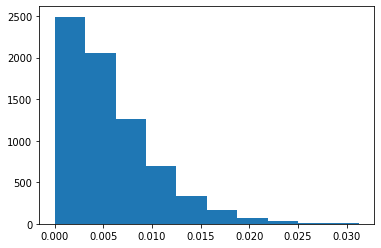

In [82]:
plt.hist(np.abs(coefs))

In [87]:
pipeline = make_pipeline(
    StandardScaler(),
    SelectFromModel(
        estimator=LogisticRegression(), threshold=0.02
    ),
    LogisticRegression()
)
print(cross_val_score(pipeline, X, y, cv=5).mean())

0.9723809523809525


## 4. Selekcja na podstawie ważności cech

### Drzewo decyzyjne

In [97]:
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [98]:
fi = tree.feature_importances_

In [99]:
fi.sum()

1.0

### Las losowy

Ważność na podstawie lasów lasowych to uśrednianie ważności z pojedynczych drzew.

W praktyce jedna z lepszych i najsensowniejszych metod oceny ważności cech.

Uwaga: im więcej drzew w lesie tym ocena rzetelniejsza! (drzew powinno być przynajmniej kilkadziesiąt)

In [100]:
coefs = RandomForestClassifier().fit(X,y).feature_importances_

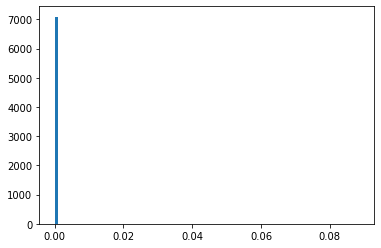

In [101]:
ax = plt.hist(coefs, bins=100)

In [102]:
pipeline = make_pipeline(
    StandardScaler(),
    SelectFromModel(
        estimator=RandomForestClassifier(), threshold=0.00001
    ),
    RandomForestClassifier()
)
print(cross_val_score(pipeline, X, y, cv=5).mean())

0.9171428571428573


## 5. Selekcja rekursywna - iteracyjne usuwanie zmiennych

In [103]:
from sklearn.feature_selection import RFE, RFECV

In [104]:
?RFE

In [109]:
rfe = RFE(estimator=LogisticRegression(penalty='l1'), 
           n_features_to_select=100, 
           step=100, 
           verbose=1)
X_tr = rfe.fit_transform(X, y)

Fitting estimator with 7129 features.
Fitting estimator with 7029 features.
Fitting estimator with 6929 features.
Fitting estimator with 6829 features.
Fitting estimator with 6729 features.
Fitting estimator with 6629 features.
Fitting estimator with 6529 features.
Fitting estimator with 6429 features.
Fitting estimator with 6329 features.
Fitting estimator with 6229 features.
Fitting estimator with 6129 features.
Fitting estimator with 6029 features.
Fitting estimator with 5929 features.
Fitting estimator with 5829 features.
Fitting estimator with 5729 features.
Fitting estimator with 5629 features.
Fitting estimator with 5529 features.
Fitting estimator with 5429 features.
Fitting estimator with 5329 features.
Fitting estimator with 5229 features.
Fitting estimator with 5129 features.
Fitting estimator with 5029 features.
Fitting estimator with 4929 features.
Fitting estimator with 4829 features.
Fitting estimator with 4729 features.
Fitting estimator with 4629 features.
Fitting esti

In [112]:
X_tr.shape

(72, 100)

In [113]:
pipeline = make_pipeline(
    StandardScaler(),
    RFE(estimator=LogisticRegression(penalty='l1'), 
           n_features_to_select=100, 
           step=100,
           verbose=0),
    LogisticRegression()
)
print(cross_val_score(pipeline, X, y, cv=5).mean())

0.9580952380952382


In [115]:
pipeline = make_pipeline(
    StandardScaler(),
    RFECV(estimator=LogisticRegression(penalty='l1'), 
          step=100,
          verbose=0,
          cv=5),
    LogisticRegression()
)
print(cross_val_score(pipeline, X, y, cv=5).mean())

0.8609523809523811


## 6. Metoda losowych podzbiorów

Algorytm:

1. Powtórz $T$ razy:
 - wylosuj podzbiór $K$ zmiennych,
 - spośród wybranych zmiennych wybierz zmienne istotne.
2. Zwróć te zmienne, które w powyższym kroku zostały przynajmniej raz uznane za istotne.

Uwaga: w praktyce dobrze jest sterować losowaniem tak, żeby każda zmienna była wybrana przynajmniej kilka razy.

### Zadanie: 

1. Zaimplementować powyższy algorytm - funkcję, która zwraca indeksy wybranych zmiennych.

2. Zaimplementuj kroswalidacyjną ocenę powyższego schematu selekcji 
   (z dowolnym klasyfikatorem, dowolnym selektorem bazowym, dowolnymi parametrami)

In [120]:
selector.get_support()

array([False, False, False, ..., False, False, False])

In [124]:
def random_subsets_selection(selector, T, K, X, y):
    # Utwórz pusty kontener na wybrane zmienne
    selected_features = set()
    
    # Wyznacz liczbę zmiennych
    features_number = X.shape[1]
    
    for _ in range(T):
        # Wylosuj K indeksów bez powtorzeń z zakresu od 0 do ostatniego indeksu kolumny
        features_subset_indices = np.random.choice(range(features_number), size=K, replace=False)
        
        # Dopasuj selector używając wylosowanych kolumn
        selector.fit(X[:, features_subset_indices], y)
    
        # Pobierz indeksy wylosowanch kolumn, które okazały się istotne
        selected_features_indices = features_subset_indices[selector.get_support()]
        
        # Dodaj je do zbioru
        selected_features.update(selected_features_indices)
    
    # Zwróć indeksy wybranych kolumn
    return selected_features

In [139]:
selected = random_subsets_selection(selector=SelectFromModel(LogisticRegression(), threshold=0.2),
                                    T = 200,
                                    K = 100,
                                    X = X, 
                                    y = y)

In [140]:
len(selected)

3772

In [130]:
from sklearn.model_selection import KFold

In [137]:
kf = KFold(n_splits=5)

scores = []

for train_idx, test_idx in kf.split(X):
    
    # Na podstawie indeksów stwórz zbiory treningowe i walidacyjne
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Przeprowadź selekcję zmiennych dla wybraego thresholdu
    selected = random_subsets_selection(selector=SelectFromModel(LogisticRegression(), threshold=0.2),
                                    T = 200,
                                    K = 100,
                                    X=X_train, 
                                    y=y_train)
    
    model = LogisticRegression()
    # Dopsauj model na wybranych kolumnach
    model.fit(X_train[:, list(selected)], y_train)
    
    # Wykonaj predykję na wybranych kolumna ze zbioru testowego
    y_pred = model.predict(X_test[:, list(selected)])
    
    # Dodaj wyniki do listy
    scores.append(f1_score(y_pred, y_test))

C:\Users\Waldemar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [138]:
scores

[1.0, 0.9565217391304348, 0.8, 0.923076923076923, 0.0]

In [141]:
X.shape

(72, 7129)

## 7. Filtrowanie (powierzchowna / wstępna selekcja zmiennych)




Selekcja polega na usunięciu zmiennych, które nie spełniają określonego wymogu ("filtr" ich nie przepuszcza).

Filtry to <u>jednowymiarowe</u> miary zależności zmiennej objaśnianej $Y$ od zmiennej $X_i$ lub miara ocena przydatności zmiennej $X_i$ tylko na podstawie jej rozkładu (np. jeżeli zmienna przyjmuje tę samą wartość dla prawie wszystkich obserwacji). Czyli metoda polega na tym, że usuwamy te zmienne, od których $Y$ nie zależy wystarczająco mocno.

Filtrowania używamy tylko wtedy, gdy zmiennych jest tak dużo, że nie da się zastosować lepszych metod selekcji. Ale filtrowanie należy traktować raczej jako selekcję wstępną - po tym zabiegu robimy z reguły normalną selekcję (no chyba, że ze względów obliczeniowych nie możemy sobie pozwolić na wykonywanie selekcji nawet na zmniejszonym podzbiorze).


Przykładowe filtry:

1. Korelacja $Y$ z $X$.

2. Informacja wzajemna $X$ z $Y$:

$ I(X,Y) = H(Y) - H(Y | X)$,

gdzie

$H(Y)$ - entropia zmiennej $Y$,

$H(Y|X)$ - entropia zmiennej $Y$, przy znanym $X$ (entropia warunkowa).


In [142]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
?SelectKBest

In [143]:
selector = SelectKBest(mutual_info_classif, k=100)
X_mi = selector.fit_transform(X, y)

In [144]:
X_mi.shape

(72, 100)

In [146]:
pipeline = make_pipeline(
    StandardScaler(),
    SelectKBest(mutual_info_classif, k=100),
    LogisticRegression()
)
print(cross_val_score(pipeline, X, y, cv=5).mean())

0.9304761904761903


# Zadanie do domu

Przetestuj poznane metody selekcji zmiennych na danych gisette: http://featureselection.asu.edu/datasets.php. Przeanalizuj różne warianty z różnymi parametrami.

In [148]:
import scipy
mat = scipy.io.loadmat("Dane/gisette.mat")

In [152]:
X = mat['X']
y = mat['Y']

In [153]:
X.shape

(7000, 5000)

In [154]:
y.shape

(7000, 1)

In [155]:
y

array([[ 1],
       [-1],
       [ 1],
       ...,
       [ 1],
       [-1],
       [-1]], dtype=int16)

### Instalacja xgboost:
- w linux:
 - pip install xgboost
 - sprawdzić w Jupyterze czy działa komenda "from xgboost.sklearn import XGBClassifier"
 - jeżeli po powyższym nie działa to drugi krok: conda install libgcc
- w windows:
 - http://xgboost.readthedocs.io/en/latest/build.html#building-on-windows
 - sprawdzić w Jupyterze czy działa komenda "from xgboost.sklearn import XGBClassifier"
 - jeżeli po powyższym nie działa to drugi krok: wykonać instrukcje z https://www.ibm.com/developerworks/community/blogs/jfp/entry/Installing_XGBoost_For_Anaconda_on_Windows?lang=en 

### Łączenie klasyfikatorów (_ensembling_)

In [156]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score


from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

dataset = pd.read_csv('Dane/diabetes.csv').values

X = dataset[:,0:9]
Y = dataset[:,9]
print(dataset)
print(X.shape)
print(np.mean(Y))

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

models = [LogisticRegression(),
          DecisionTreeClassifier(),
          SVC(probability=True), 
          RandomForestClassifier(),
          KNeighborsClassifier(17)]

for model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    predictions = np.round(y_pred)

    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

[[ 0.   0.   6.  ... 33.6 50.   1. ]
 [ 0.   0.   1.  ... 26.6 31.   0. ]
 [ 0.   1.   8.  ... 23.3 32.   1. ]
 ...
 [ 0.   0.   5.  ... 26.2 30.   0. ]
 [ 0.   1.   1.  ... 30.1 47.   1. ]
 [ 0.   0.   1.  ... 30.4 23.   0. ]]
(768, 9)
0.3489583333333333
Accuracy: 76.77% AUC:  0.8238056897477187
Accuracy: 68.90% AUC:  0.6716317767042405
Accuracy: 63.78% AUC:  0.590378421900161
Accuracy: 68.50% AUC:  0.7759997316156737
Accuracy: 72.44% AUC:  0.8011943102522814


In [157]:
from sklearn.ensemble import VotingClassifier

In [158]:
?VotingClassifier

In [167]:
models = [LogisticRegression(),
          DecisionTreeClassifier(),
          SVC(probability=True), 
          RandomForestClassifier(),
          KNeighborsClassifier(17)]

voting_clf = VotingClassifier(estimators=[
    ('lr', models[0]),
    ('dt', models[1]),
    ('svm', models[2]),
    ('rf', models[3]),
    ('knn', models[4])
], voting='soft')

In [169]:
for _ in range(10):
    voting_clf.fit(X_train, y_train)
    y_pred = voting_clf.predict_proba(X_test)[:,1]
    predictions = np.round(y_pred)

    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

Accuracy: 74.41% AUC:  0.8099168008588299
Accuracy: 74.80% AUC:  0.8170960815888352
Accuracy: 74.80% AUC:  0.818438003220612
Accuracy: 73.62% AUC:  0.8032742887815352
Accuracy: 75.98% AUC:  0.8205850778314546
Accuracy: 75.98% AUC:  0.8187734836285561
Accuracy: 74.02% AUC:  0.8107219538378958
Accuracy: 77.17% AUC:  0.8164922168545357
Accuracy: 74.80% AUC:  0.8162238325281803
Accuracy: 75.59% AUC:  0.8162909286097692


# XGBoost







XGBoost jest to komitet drzew regresyjnych, który stosuje się zarówno do problemu regresji jak i klasyfikacji. Wartość zwracana przez model (dla $i$-tej obserwacji):

$$\hat{y}_i = \sum\limits_{k=1}^K f_k(x_i),$$

gdzie $f_k(\cdot)$ - wartość (liczba rzeczywista) zwracana przez $k$-te drzewo.


Predykcja zależy od problemu:

 1) Regresja

  - predykcja: $ pred_i = \hat{y}_i $
    

2) Klasyfikacja binarna

  - predykcja: $pred_i = p(x_i) = sigmoid(\hat{y}_i) = \frac{1}{1+\exp{(-\hat{y}_i)}}$
  
3) Klasyfikacja wieloklasowa

  - predykcja: $pred_i^c =softmax(\hat{y}_i)^c = \frac{\exp{(\hat{y}_i^c)}}{\sum\limits_c\exp{(\hat{y}_i^c)}}$




Uczenie modelu - budowanie komitetu - polega na konstruowaniu kolejnych drzew w taki sposób, aby zminimalizować fukcję celu:

### $$Obj(\Theta) = L(\Theta) + \Omega(\Theta),$$

gdzie

$\Theta$ - model (zestaw konkretnych drzew)

$L(\Theta)$ - funkcja straty (miara dopasowania modelu)

$\Omega(\Theta)$ - regularyzacja (miara złozoności modelu)

Fukcja straty zależy od problemu:

 1) Regresja
    
  - funkcja straty - kwadratowa: $\sum\limits_i (y_i - \hat{y}_i)^2$


2) Klasyfikacja binarna

  - funkcja straty - log-loss (_binomial cross-entropy_): $ - \frac{1}{n}\sum\limits_{i=1}^n \big( y_i\log(p(x_i)) + (1-y_i)\log(1-p(x_i))   \big) $

3) Klasyfikacja wieloklasowa

  - funkcja straty - log-loss (_multinomial cross-entropy_): $ = -\frac{1}{n}\sum_{i=1}^n\sum\limits_c y_{ij} \log(p(x_i)_j) $


Drzewa uczone są iteracyjnie:

\begin{split}\hat{y}_i^{(0)} &= 0\\
\hat{y}_i^{(1)} &= f_1(x_i) = \hat{y}_i^{(0)} + f_1(x_i)\\
\hat{y}_i^{(2)} &= f_1(x_i) + f_2(x_i)= \hat{y}_i^{(1)} + f_2(x_i)\\
&\dots\\
\hat{y}_i^{(t)} &= \sum_{k=1}^t f_k(x_i)= \hat{y}_i^{(t-1)} + f_t(x_i)
\end{split}

W danym kroku znajdujemy drzewo, które najlepiej poprawia naszą funkcję celu.

Regularyzacja:

\begin{split}\Omega(\Theta) = \sum_{i=1}^t\Omega(f_i),  \\
\Omega(f) = \gamma T + \frac{1}{2}\lambda \sum_{j=1}^T w_j^2,
\end{split}

gdzie $T$ - liczba liści w drzewie $f$, $w_j$ wartość zwracana przez drzewo dla obseracji w $j$-tym liściu. Uwaga: wartości $w_{(\cdot)}$ są wyliczane na podstawie funkcji celu - w przybliżeniu znajdowane są takie, które dają najlepszy wynik.


W praktyce dodaje się kolejną regularyzację:

$$\hat{y}_i^{(k)} = \hat{y}_i^{(k-1)} + \eta \cdot f_k(x_i),$$

gdzie $\eta$ - _learning rate_.

<br>

Przykład modelu złożonego z dwóch drzew:

<img src="Grafika/xgboost.png" width = 500>
https://xgboost.readthedocs.io/en/latest/model.html

In [170]:
from xgboost.sklearn import XGBClassifier

In [173]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:,1]
predictions = np.round(y_pred)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

Accuracy: 72.44% AUC:  0.8097826086956521


In [174]:
model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

## Jak szukać parametrów?

W przypadku klasyfikatora XGBoost jest to bardzo problematyczna kwestia bo parametrów jest mnóstwo. Dlatego zwykły "grid search" odpada 0 nigdy nie doczekamy się wyniku... Nie ma jedynego słusznego rozwiązania. Na pewno warto szukać w internecie doniesienia jak robią to inni ludzie i wykorzystać ich doświadczenia (uwaga na rzetelność źródeł - w internecie można często trafić na materiały, których autorami nie są profesjonaliści...).

### Przykładowy schemat poszukiwania

Jednym z sensownych pomysłów jest zaczęcie od małej liczby drzew i dużego learning rate. Potem dla tych parametrów szukanie optymalnych innych parametrów, a na koniec zwiększenie liczby drzew i zmiejszenie learnig rate (rówinież analizując różne wartości).

In [175]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier()

params = {
    'n_estimators': [2, 5, 10, 20, 50],
    'learning_rate': [0.1, 0.3, 0.5]
}

gscv = GridSearchCV(param_grid=params, estimator=model)
gscv.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'n_estimators': [2, 5, 10, 20, 50]},
             pre_dispatch='2*n_jobs', ref

In [176]:
gscv.cv_results_

{'mean_fit_time': array([0.0024306 , 0.00365988, 0.00615478, 0.01247112, 0.02559861,
        0.00232617, 0.0029916 , 0.00531864, 0.01262983, 0.02477058,
        0.00232752, 0.00332451, 0.00605885, 0.01181746, 0.02593017]),
 'std_fit_time': array([5.96343676e-04, 4.97396103e-04, 8.51653213e-04, 7.09641205e-04,
        4.69067144e-04, 4.68897739e-04, 4.89903609e-07, 4.69178808e-04,
        9.43194211e-04, 2.31144623e-03, 4.70640060e-04, 4.70190333e-04,
        8.20115377e-04, 1.00214010e-03, 1.40972791e-03]),
 'mean_score_time': array([0.00058413, 0.00099746, 0.00132871, 0.00066463, 0.00117445,
        0.00099738, 0.00132966, 0.00033243, 0.00099889, 0.00099762,
        0.00033236, 0.00033228, 0.00092228, 0.00099762, 0.00099707]),
 'std_score_time': array([4.32387458e-04, 1.74478677e-06, 4.69853884e-04, 4.69965550e-04,
        2.51195519e-04, 4.49566384e-07, 4.70696044e-04, 4.70134046e-04,
        1.67836444e-06, 4.49566384e-07, 4.70021655e-04, 4.69909263e-04,
        1.05258375e-04, 4.89

In [177]:
gscv.best_params_

{'learning_rate': 0.1, 'n_estimators': 20}

Jesteśmy na skraju learnig_rate, należy poszerzyć zekres poszukiwań. 

In [178]:
model = XGBClassifier()

params = {
    'n_estimators': [2, 5, 10, 20, 50],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5]
}

gscv2 = GridSearchCV(param_grid=params, estimator=model)
gscv2.fit(X_train, y_train)
print(gscv2.best_params_)

{'learning_rate': 0.1, 'n_estimators': 20}


In [182]:
model = XGBClassifier(**gscv2.best_params_)

params = {
    'max_depth': [2, 3, 5, 7, 10],
    'min_child_weight': [3, 5, 7, 10, 20]
}

gscv3 = GridSearchCV(param_grid=params, estimator=model)
gscv3.fit(X_train, y_train)
print(gscv3.best_params_)

{'max_depth': 3, 'min_child_weight': 5}


In [183]:
gscv3.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [184]:
y_pred = gscv3.best_estimator_.predict_proba(X_test)[:,1]
predictions = np.round(y_pred)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

Accuracy: 74.80% AUC:  0.8295759527643585


### Randomizowana optymalizacja parametrów

Dobrym sposobem na przyspieszenie procesu optymalizacji parametrów jest randomizacja. Polega to na tym, że zamiast sprawdzać konkrentnych kombinacji parametrów, sprawdzamy losowe kombinacje. Wówczas określamy sposób w jaki wartości mają być losowane i sprawdzamy model dla określonej liczby losowych kombinacji.

Okazuje się, że w praktyce takie podejście działa bardzo dobrze. Kilkadziesiąt (ponad 50) losowań jest rozsądną liczbą, ale im więcej tym lepiej. I tak będzie to dużo mniej niż sprawdzenie wszystkich kombinacji w grid search'u.


In [185]:
from sklearn.model_selection import RandomizedSearchCV

In [186]:
import scipy.stats as ss

In [187]:
model = XGBClassifier()

params = {
    'n_estimators': ss.randint(10, 300),
    'learning_rate': ss.uniform(0.001, 0.6),
    'max_depth': ss.randint(3, 15),
    'min_child_weight': ss.randint(3, 15),
    'reg_lambda': ss.uniform(0.001, 4)
}

rscv  = RandomizedSearchCV(estimator=model, 
                          param_distributions=params,
                          n_iter=100)
rscv.fit(X_train, y_train)
print(rscv.best_params_)

{'learning_rate': 0.3489710192452666, 'max_depth': 12, 'min_child_weight': 11, 'n_estimators': 14, 'reg_lambda': 2.1255134095069637}


In [188]:
y_pred = rscv.best_estimator_.predict_proba(X_test)[:,1]
predictions = np.round(y_pred)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

Accuracy: 73.62% AUC:  0.822698604401503


In [189]:
model = XGBClassifier()

params = {
    'n_estimators': ss.randint(10, 30),
    'learning_rate': ss.uniform(0.2, 0.4),
    'max_depth': ss.randint(3, 15),
    'min_child_weight': ss.randint(8, 15),
    'reg_lambda': ss.uniform(1, 4)
}

rscv2  = RandomizedSearchCV(estimator=model, 
                          param_distributions=params,
                          n_iter=100)
rscv2.fit(X_train, y_train)
print(rscv2.best_params_)

{'learning_rate': 0.46474896966978907, 'max_depth': 6, 'min_child_weight': 12, 'n_estimators': 16, 'reg_lambda': 4.584841439979025}


In [190]:
y_pred = rscv2.best_estimator_.predict_proba(X_test)[:,1]
predictions = np.round(y_pred)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

Accuracy: 73.23% AUC:  0.8105206655931294


## Case study: dane "adults".

Zadanie: Przygotuj dane do modelowania i znajdź najlepszą konfigurację dla XGBoost'a.

In [191]:
# Wczytaj dane treningowe i testowe

import pandas as pd
import numpy as np
train_set = pd.read_csv('Dane/adult/adult.data', sep = ",",skipinitialspace=True,  header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep = "," ,skiprows = 1, skipinitialspace=True, header = None) # Make sure to skip a row for the test set

In [192]:
train_set.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [193]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [194]:
train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [195]:
train_set.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [197]:
train_set['workclass'].unique() # braki danych oznaczone znakiem zapytania

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [201]:
train_set = train_set.replace('?', np.nan).dropna(inplace=False)
test_set = test_set.replace('?', np.nan).dropna(inplace=False)

In [202]:
train_set['workclass'].unique() # usunięte wiersze z brakami danych oznaczonych znakiem zapytania 

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [204]:
train_set.shape

(30162, 15)

In [203]:
dataset = pd.concat([train_set, test_set])
dataset.shape

(45222, 15)

Zamiana zmiennej objaśnianej na 0-1

In [206]:
dataset['wage_class'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [207]:
dataset['wage_class'] = dataset['wage_class'].replace({'<=50K': 0, 
                                                       '>50K': 1,
                                                       '<=50K.': 0, 
                                                       '>50K.': 1})

In [208]:
dataset['wage_class'].unique()

array([0, 1], dtype=int64)

In [209]:
dataset

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [210]:
dataset.drop(['fnlwgt'], axis=1,inplace=True) # usuwany kolumnę podejrzewaną o bycie unikalnym ID

In [211]:
dataset.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


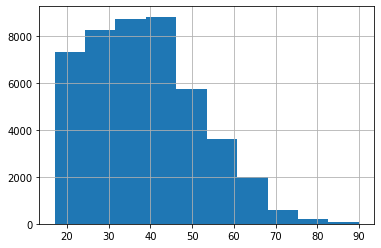

In [212]:
dataset['age'].hist()

In [214]:
dataset['workclass'].value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [215]:
dataset['education'].value_counts()

HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64

In [216]:
dataset['education_num'].value_counts()

9     14783
10     9899
13     7570
14     2514
11     1959
7      1619
12     1507
6      1223
4       823
15      785
5       676
8       577
16      544
3       449
2       222
1        72
Name: education_num, dtype: int64

In [217]:
pd.crosstab(dataset['education'], dataset['education_num'])

education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1223,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1619,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,577,0,0,0,0,0,0,0,0
1st-4th,0,222,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,449,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,823,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,676,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1507,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1959,0,0,0,0,0


In [220]:
# TODO połączyć education z education_num w słownik
dataset.drop(['education'], axis=1, inplace=True) 

KeyError: "['education'] not found in axis"

In [222]:
dataset

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
16276,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
16278,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
16279,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [223]:
dataset.describe(include='all')

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,45222.000000,45222,45222.000000,45222,45222,45222,45222,45222,45222.000000,45222.000000,45222.000000,45222,45222.000000
unique,NaN,7,NaN,7,14,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,Private,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,33307,NaN,21055,6020,18666,38903,30527,NaN,NaN,NaN,41292,NaN
mean,38.547941,NaN,10.118460,NaN,NaN,NaN,NaN,NaN,1101.430344,88.595418,40.938017,NaN,0.247844
std,13.217870,NaN,2.552881,NaN,NaN,NaN,NaN,NaN,7506.430084,404.956092,12.007508,NaN,0.431766
min,17.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,47.000000,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [224]:
dataset['native_country'].value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

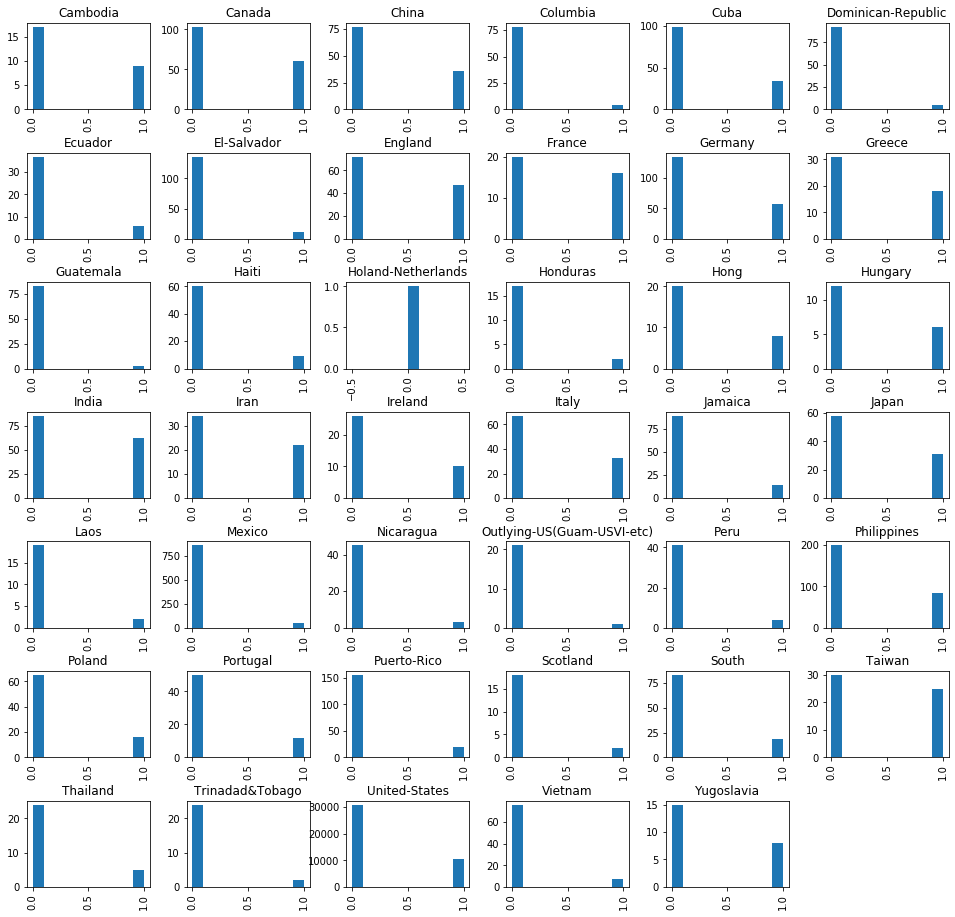

In [227]:
ax = dataset['wage_class'].hist(by=dataset['native_country'], figsize=(16, 16))

In [232]:
mean_wage = dataset.groupby('native_country')['wage_class'].mean()
mean_wage

native_country
Cambodia                      0.346154
Canada                        0.368098
China                         0.318584
Columbia                      0.048780
Cuba                          0.255639
Dominican-Republic            0.051546
Ecuador                       0.139535
El-Salvador                   0.074830
England                       0.394958
France                        0.444444
Germany                       0.300518
Greece                        0.367347
Guatemala                     0.034884
Haiti                         0.130435
Holand-Netherlands            0.000000
Honduras                      0.105263
Hong                          0.285714
Hungary                       0.333333
India                         0.421769
Iran                          0.392857
Ireland                       0.277778
Italy                         0.330000
Jamaica                       0.135922
Japan                         0.348315
Laos                          0.095238
Mexico    

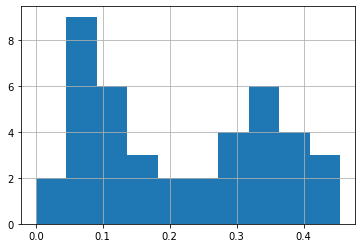

In [233]:
mean_wage.hist()

In [237]:
country_to_id = dict(pd.cut(mean_wage[mean_wage.index != 'United-States'], bins=5, labels=range(5)))
country_to_id

{'Cambodia': 3,
 'Canada': 4,
 'China': 3,
 'Columbia': 0,
 'Cuba': 2,
 'Dominican-Republic': 0,
 'Ecuador': 1,
 'El-Salvador': 0,
 'England': 4,
 'France': 4,
 'Germany': 3,
 'Greece': 4,
 'Guatemala': 0,
 'Haiti': 1,
 'Holand-Netherlands': 0,
 'Honduras': 1,
 'Hong': 3,
 'Hungary': 3,
 'India': 4,
 'Iran': 4,
 'Ireland': 3,
 'Italy': 3,
 'Jamaica': 1,
 'Japan': 3,
 'Laos': 1,
 'Mexico': 0,
 'Nicaragua': 0,
 'Outlying-US(Guam-USVI-etc)': 0,
 'Peru': 0,
 'Philippines': 3,
 'Poland': 2,
 'Portugal': 2,
 'Puerto-Rico': 1,
 'Scotland': 1,
 'South': 1,
 'Taiwan': 4,
 'Thailand': 1,
 'Trinadad&Tobago': 0,
 'Vietnam': 0,
 'Yugoslavia': 3}

In [238]:
dataset['native_country'] = dataset['native_country'].replace(country_to_id)

In [239]:
dataset

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
16276,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
16278,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
16279,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [243]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [244]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 46 columns):
age                                     45222 non-null int64
education_num                           45222 non-null int64
capital_gain                            45222 non-null int64
capital_loss                            45222 non-null int64
hours_per_week                          45222 non-null int64
wage_class                              45222 non-null int64
workclass_Local-gov                     45222 non-null uint8
workclass_Private                       45222 non-null uint8
workclass_Self-emp-inc                  45222 non-null uint8
workclass_Self-emp-not-inc              45222 non-null uint8
workclass_State-gov                     45222 non-null uint8
workclass_Without-pay                   45222 non-null uint8
marital_status_Married-AF-spouse        45222 non-null uint8
marital_status_Married-civ-spouse       45222 non-null uint8
marital_status_Married-spouse-absent 

In [246]:
train = dataset.iloc[:train_set.shape[0]]
test = dataset.iloc[train_set.shape[0]:]

In [249]:
X_train = train.drop('wage_class', axis=1, inplace=False).values
X_test = test.drop('wage_class', axis=1, inplace=False).values

y_train = train['wage_class'].values
y_test = test['wage_class'].values

In [250]:
X_train

array([[   39,    13,  2174, ...,     0,     0,     1],
       [   50,    13,     0, ...,     0,     0,     1],
       [   38,     9,     0, ...,     0,     0,     1],
       ...,
       [   58,     9,     0, ...,     0,     0,     1],
       [   22,     9,     0, ...,     0,     0,     1],
       [   52,     9, 15024, ...,     0,     0,     1]], dtype=int64)

In [251]:
y_train.mean()

0.24892248524633645

#### Baseline drzewo decyzyjne

In [252]:
model = DecisionTreeClassifier()

params = {
    'max_depth': [2, 5, 10, 20, 50],
    'min_samples_leaf': [5, 10, 15, 50]
}

gscv = GridSearchCV(param_grid=params, estimator=model)
gscv.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 5, 10, 20, 50],
                         'min_samples_leaf': [5, 10, 15, 50]},
          

In [253]:
y_pred = gscv.best_estimator_.predict_proba(X_test)[:,1]
predictions = np.round(y_pred)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

Accuracy: 85.21% AUC:  0.8940781071564522


#### XGBoost

In [255]:
from sklearn.pipeline import Pipeline

In [260]:
model = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier())
] )

params = {
    'xgb__n_estimators': ss.randint(10, 300),
    'xgb__learning_rate': ss.uniform(0.001, 0.6),
    'xgb__max_depth': ss.randint(3, 15),
    'xgb__min_child_weight': ss.randint(3, 15),
    'xgb__reg_lambda': ss.uniform(0.001, 4),
    'xgb__reg_alpha': ss.uniform(0.001, 4),
    'xgb__gamma': ss.uniform(0.001, 4)
}

rscv  = RandomizedSearchCV(estimator=model, 
                          param_distributions=params,
                          n_iter=100,
                          cv=5,
                          verbose=1,
                          n_jobs=4)
rscv.fit(X_train, y_train)
print(rscv.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  8.5min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 20.3min
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed: 22.4min finished


{'xgb__gamma': 1.8014439697684215, 'xgb__learning_rate': 0.19686882643034323, 'xgb__max_depth': 12, 'xgb__min_child_weight': 8, 'xgb__n_estimators': 263, 'xgb__reg_alpha': 1.090792841054657, 'xgb__reg_lambda': 1.3669079866903013}


In [261]:
y_pred = rscv.best_estimator_.predict_proba(X_test)[:,1]
predictions = np.round(y_pred)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

Accuracy: 86.56% AUC:  0.9248116197183097


In [266]:
model = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier())
] )

params = {
    'xgb__n_estimators': ss.randint(100, 350),
    'xgb__learning_rate': ss.uniform(0.1, 0.3),
    'xgb__max_depth': ss.randint(8, 15),
    'xgb__min_child_weight': ss.randint(5, 11),
    'xgb__reg_lambda': ss.uniform(0.5, 2),
    'xgb__reg_alpha': ss.uniform(0.5, 2),
    'xgb__gamma': ss.uniform(1, 3)
}

rscv2  = RandomizedSearchCV(estimator=model, 
                          param_distributions=params,
                          n_iter=200,
                          cv=5,
                          verbose=1,
                          n_jobs=-1)
rscv2.fit(X_train, y_train)
print(rscv2.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 75.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 93.0min finished


{'xgb__gamma': 1.9537959102836657, 'xgb__learning_rate': 0.12869546776937824, 'xgb__max_depth': 14, 'xgb__min_child_weight': 5, 'xgb__n_estimators': 181, 'xgb__reg_alpha': 1.8321806972446422, 'xgb__reg_lambda': 2.2673751762328243}


In [267]:
y_pred = rscv2.best_estimator_.predict_proba(X_test)[:,1]
predictions = np.round(y_pred)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

Accuracy: 86.61% AUC:  0.9249922202131708


In [268]:
model = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier())
] )

params = {
    'xgb__n_estimators': ss.randint(100, 250),
    'xgb__learning_rate': ss.uniform(0.1, 0.2),
    'xgb__max_depth': ss.randint(11, 17),
    'xgb__min_child_weight': ss.randint(3, 7),
    'xgb__reg_lambda': ss.uniform(1.5, 3),
    'xgb__reg_alpha': ss.uniform(1.3, 2),
    'xgb__gamma': ss.uniform(1.5, 2.5)
}

rscv3  = RandomizedSearchCV(estimator=model, 
                          param_distributions=params,
                          n_iter=200,
                          cv=5,
                          verbose=1,
                          n_jobs=-1)
rscv3.fit(X_train, y_train)
print(rscv2.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 53.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 65.4min finished


{'xgb__gamma': 1.9537959102836657, 'xgb__learning_rate': 0.12869546776937824, 'xgb__max_depth': 14, 'xgb__min_child_weight': 5, 'xgb__n_estimators': 181, 'xgb__reg_alpha': 1.8321806972446422, 'xgb__reg_lambda': 2.2673751762328243}


In [269]:
y_pred = rscv3.best_estimator_.predict_proba(X_test)[:,1]
predictions = np.round(y_pred)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

Accuracy: 86.59% AUC:  0.9249407594213932
